In [2]:
import os
from PIL import Image
import pandas as pd
from tqdm.auto import tqdm


In [3]:
import sys
sys.path.append("../src")

In [4]:
from utils import read_xray

In [5]:
original = read_xray("/scratch/scratch6/akansh12/DeepEXrays/physionet.org/files/vindr-cxr/1.0.0/train/00053190460d56c53cc3e57321387478.dicom")

In [9]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut


In [5]:
def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

In [6]:
def resize(array, size, keep_ratio=False, resample=Image.LANCZOS):
    # Original from: https://www.kaggle.com/xhlulu/vinbigdata-process-and-resize-to-image
    im = Image.fromarray(array)
    
    if keep_ratio:
        im.thumbnail((size, size), resample)
    else:
        im = im.resize((size, size), resample)
    

    return im

Text(0.5, 1.0, 'Original: (2430, 1994)')

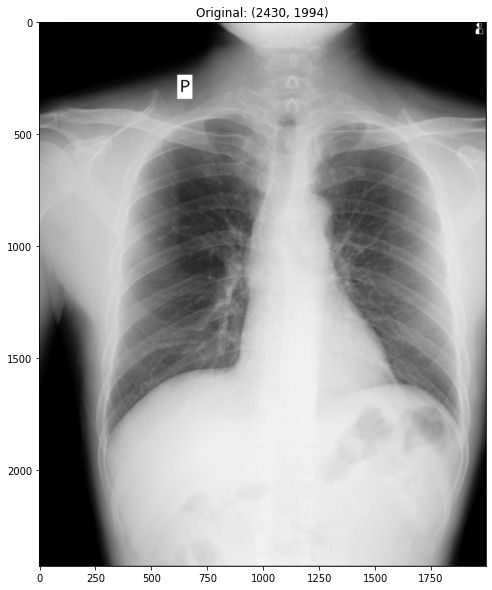

In [15]:
plt.figure(figsize = (10,10))
original = read_xray("/scratch/scratch6/akansh12/DeepEXrays/physionet.org/files/vindr-cxr/1.0.0/train/00053190460d56c53cc3e57321387478.dicom")
plt.imshow(original, cmap = 'gray')
plt.title(f"Original: {(original.shape)}")

Text(0.5, 1.0, 'Resized: (1024, 1024)')

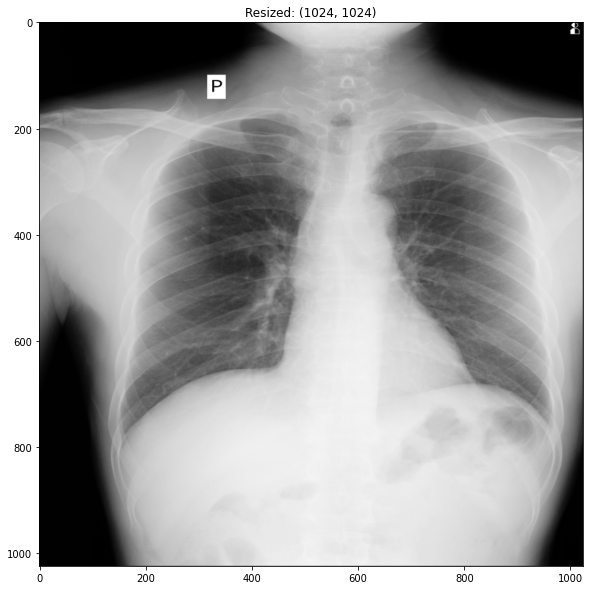

In [19]:
plt.figure(figsize = (10,10))
plt.imshow(np.array(resize(original, size = 1024)), cmap = 'gray')
plt.title(f"Resized: {(np.array(resize(original, size = 1024)).shape)}")

In [ ]:
image_id = []
dim0 = []
dim1 = []

for split in ['train', 'test']:
    load_dir = f'../input/vinbigdata-chest-xray-abnormalities-detection/{split}/'
    save_dir = f'/kaggle/tmp/{split}/'

    os.makedirs(save_dir, exist_ok=True)

    for file in tqdm(os.listdir(load_dir)):
        # set keep_ratio=True to have original aspect ratio
        xray = read_xray(load_dir + file)
        im = resize(xray, size=1024)  
        im.save(save_dir + file.replace('dicom', 'png'))
        
        if split == 'train':
            image_id.append(file.replace('.dicom', ''))
            dim0.append(xray.shape[0])
            dim1.append(xray.shape[1])
